Here, we will make predictions using the Linear Regression model defined previously in linear_regression.py module.

In [1]:
import torch
from torch import nn

import linear_regression, utils

In [2]:
lin_reg_model = linear_regression.Linear_Regresssion_Model()

Predict `y_test` from `x_test`.

In [3]:
X = torch.arange(1,10.1,0.5)
X = X.unsqueeze(dim = 1)
weight = 0.3
bias = 0.9
y = weight * X + bias
y


tensor([[1.2000],
        [1.3500],
        [1.5000],
        [1.6500],
        [1.8000],
        [1.9500],
        [2.1000],
        [2.2500],
        [2.4000],
        [2.5500],
        [2.7000],
        [2.8500],
        [3.0000],
        [3.1500],
        [3.3000],
        [3.4500],
        [3.6000],
        [3.7500],
        [3.9000]])

In [4]:
train_split = int(0.6 * len(X))
train_X, train_y = X[:train_split], y[:train_split]
test_X, test_y = X[train_split:], y[train_split:]
test_X, test_y

(tensor([[ 6.5000],
         [ 7.0000],
         [ 7.5000],
         [ 8.0000],
         [ 8.5000],
         [ 9.0000],
         [ 9.5000],
         [10.0000]]),
 tensor([[2.8500],
         [3.0000],
         [3.1500],
         [3.3000],
         [3.4500],
         [3.6000],
         [3.7500],
         [3.9000]]))

Make predictions using `torch.inference_mode()`. Note that `torch.inference_mode()` is optional but it automatically detaches the `predicitons` variable from the computation graph so as to not keep track of this variable wrt to the computation graph. It also makes the inference faster.

In [13]:
# predictions = lin_reg_model(test_X)

# using context manager to make inference
with torch.inference_mode():
    predictions = lin_reg_model(test_X)

predictions

tensor([[1.7771],
        [1.7871],
        [1.7971],
        [1.8071],
        [1.8172],
        [1.8272],
        [1.8372],
        [1.8473]])

Check the difference for each element of the y_test vs. predictions.

In [14]:
test_y - predictions

tensor([[1.0729],
        [1.2129],
        [1.3529],
        [1.4929],
        [1.6328],
        [1.7728],
        [1.9128],
        [2.0527]])

If the values were 0.0 for each element, our model would have been perfect. But it is not. Let's visualize our `predictions` vs the ground truth for `y_test`. Notice that if the inference was not made with the `inference_mode()`, the `predictions` variable is still attached to the computation graph and is first detached from the computation graph in order to pass it to `plot_predictions()`.

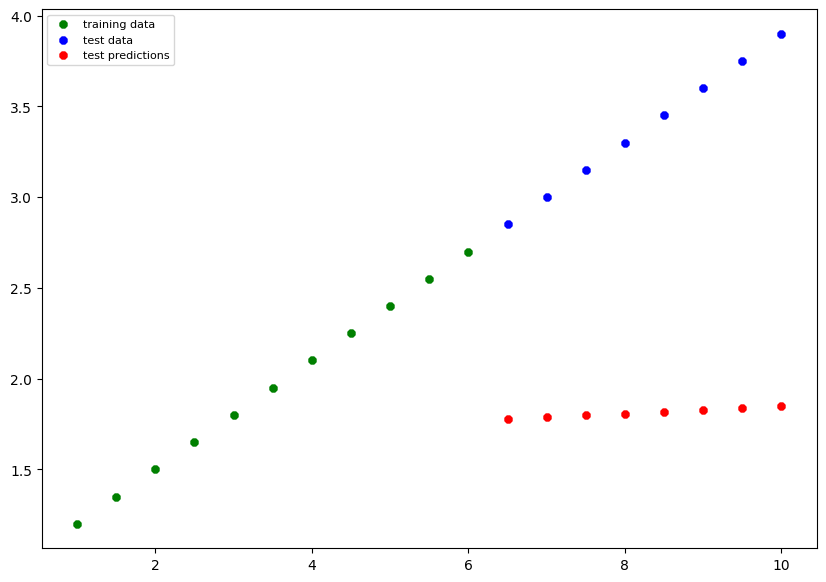

In [16]:
# if context manager was not used while making predictions above
#utils.plot_predictions(train_X, train_y, test_X, test_y, predictions.detach().numpy())

# if context manager used above
utils.plot_predictions(train_X, train_y, test_X, test_y, predictions)

As visible above, the model's predictions are far from being accurate.